#Import#

In [5]:
import pandas as pd
import numpy as np

#Reading the Files#

In [6]:
uni1 = pd.read_excel("University_Clustering.xlsx")
uni1.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [8]:
uni1.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


On Basis on Describe All measures like skewness or outliers can be found.

In [9]:
uni1.info()
uni = uni1.drop(["State"], axis = 1) #In Dataset, State is dropped because, we need only numerical values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [10]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


#Importing Libraries#

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale # Here in scale, scaleFunction is [(x - u(meu)) / Sigma] i.e. Standardization is done
                                        # we are not using Normalization, i.e. min-max scalling
                                        # but we have scale function for Stadardization
                                        # It is taking standardization of all data.

# Considering only numerical data#

In [12]:
uni.data = uni.iloc[:, 1:] #Slicing is done, for column UNIV is removed and assigned to univ.data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [14]:
uni.data

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


# Normalizing the numerical data with scale #

Normalization means coverting the whole data from 0 to 1

In [15]:
uni_normal = scale(uni.data) #Normalizing and Standardizing the data with scale and assigning to uni-normal
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

# Getting Describe of Normalized Data by Making it to DataFrame #

In [16]:
a = pd.DataFrame(uni_normal)
a

,0,1,2,3,4,5
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587
5,0.692848,0.657519,-0.838130,-0.682530,0.337780,0.932982
6,0.457378,0.710037,-0.475975,-0.180670,0.296955,0.932982
7,-0.107751,-0.130243,-0.786394,-0.180670,-0.513817,0.594945
8,1.257977,0.762555,-1.303758,-0.431600,0.858743,1.158339
9,0.363190,-0.077726,0.248335,-1.435321,2.214818,0.031550


In [17]:
a.describe()

,0,1,2,3,4,5
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,-5.151435e-16,-2.087219e-16,-1.332268e-16,-1.909584e-16,-8.881784e-18,1.421085e-16
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00
min,-2.462455e+00,-2.546050e+00,-1.303758e+00,-1.686251e+00,-1.321971e+00,-2.222029e+00
25%,-2.490335e-01,-1.302435e-01,-7.863939e-01,-4.315999e-01,-8.665972e-01,-6.445235e-01
50%,1.748132e-01,2.373792e-01,-1.655566e-01,-1.806697e-01,1.167444e-02,3.695869e-01
75%,6.928481e-01,7.100370e-01,5.587536e-01,3.211906e-01,5.293827e-01,8.203026e-01
max,1.399259e+00,1.235212e+00,2.628211e+00,3.081422e+00,2.560381e+00,1.158339e+00


So here, std is close to 1 and mean is equal to (nearly) to 0

#PCA#

In [20]:
pca = PCA(n_components = 6) #With PCA number of components are assigned 
pca_values = pca.fit_transform(uni_normal) #and that pca is fit_transform with uni-normal data

In [19]:
pca

PCA(n_components=6)

In [21]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

##PCA Weights##

In [23]:
# PCA weights
pca.components_ # This components_ will give 6x6 components

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

In [25]:
pca.components_[0] # For getting first component 

array([-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
       -0.37940403])

## The amount of variance that each PCA explains ##


In [27]:
var = pca.explained_variance_ratio_ # With this we can get ratio for PCA variance.
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

## Cumulative variance ##

In [30]:
var1 = np.cumsum(np.round(var, decimals = 4) * 100) # Getting in percentage
var1
                                    # numpy.cumsum(a, axis=None, dtype=None, out=None)
                                    # Return the cumulative sum of the elements along a given axis.

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

More Variance means More knowledge

So, here in first component, I'm getting 76.87 percent of the data; and in second component , I'm getting 89.98 % data; and so on.

## Variance plot for PCA components obtained ##


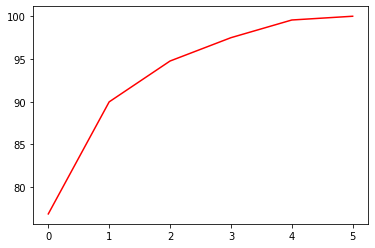

In [31]:
plt.plot(var1, color = "red")

In this plot, from 0 to 1 there is drastic change, from 0 to 2 there is also remarkable change.. but from 2 to 3 there is drastic change.. so no. of principle components can be  = 3

## PCA scores##

In [33]:
pca_values # it means, taking original data and multiplying with weights and get new data.
           # 25 x 6 (oroginal data) Multiply by 6 x 6 (weights) = 25 x 6 (score) so from this score I'm going to 
           # choose effective number of columns to get more storage.

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

##Creating DataFrame of pca_values (Columsn and rows)##

In [34]:
pca_data = pd.DataFrame(pca_values)                 # Creating the Dataframe of the given pca_values and assigning to pca_data
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5" # Naming the columns of the dataframe data_pca

In [35]:
pca_data

,comp0,comp1,comp2,comp3,comp4,comp5
0,-1.009874,-1.064310,0.081066,0.056951,-0.128754,-0.034650
1,-2.822238,2.259045,0.836829,0.143845,-0.125962,-0.180703
2,1.112466,1.631209,-0.266787,1.075075,-0.191814,0.345679
3,-0.741741,-0.042187,0.060501,-0.157208,-0.577611,0.109163
4,-0.311912,-0.635244,0.010241,0.171364,0.012726,-0.016921
5,-1.696691,-0.344363,-0.253408,0.012564,-0.052661,-0.027166
6,-1.246821,-0.490984,-0.032094,-0.205644,0.293505,-0.078012
7,-0.338750,-0.785169,-0.493585,0.039856,-0.544979,-0.155372
8,-2.374150,-0.386539,0.116098,-0.453366,-0.230108,0.266984
9,-1.403277,2.119515,-0.442827,-0.632543,0.230054,-0.235615


In [37]:
uni.Univ #These are the names of the universities

0            Brown
1          CalTech
2              CMU
3         Columbia
4          Cornell
5        Dartmouth
6             Duke
7       Georgetown
8          Harvard
9     JohnsHopkins
10             MIT
11    Northwestern
12       NotreDame
13       PennState
14       Princeton
15          Purdue
16        Stanford
17        TexasA&M
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
23      UWisconsin
24            Yale
Name: Univ, dtype: object

In [40]:
final = pd.concat([uni.Univ, pca_data.iloc[:, 0:3]], axis = 1) # Getting first three rows, i.e. choosing 95% data with university names assigning to final by pd.concat
                    # axis = 1 for joining the multiple columns and axis = 0 fro joining the multiple rows in this case

In [39]:
final

,Univ,comp0,comp1,comp2
0,Brown,-1.009874,-1.064310,0.081066
1,CalTech,-2.822238,2.259045,0.836829
2,CMU,1.112466,1.631209,-0.266787
3,Columbia,-0.741741,-0.042187,0.060501
4,Cornell,-0.311912,-0.635244,0.010241
5,Dartmouth,-1.696691,-0.344363,-0.253408
6,Duke,-1.246821,-0.490984,-0.032094
7,Georgetown,-0.338750,-0.785169,-0.493585
8,Harvard,-2.374150,-0.386539,0.116098
9,JohnsHopkins,-1.403277,2.119515,-0.442827


##Scatter diagram##

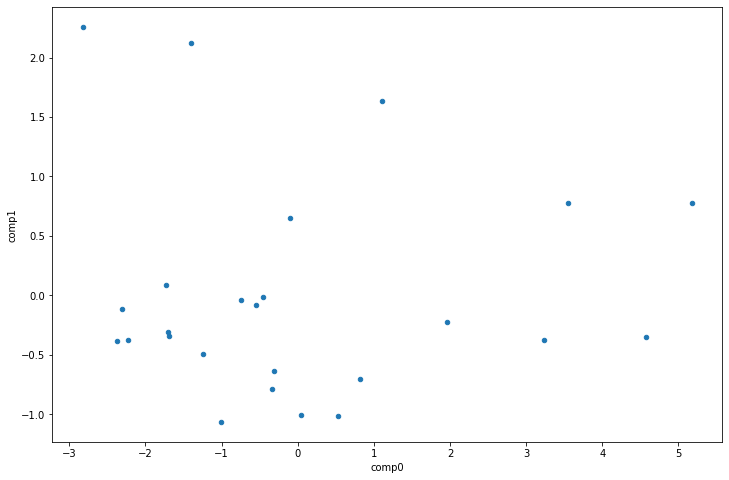

In [43]:
import matplotlib.pylab as plt
ax = final.plot(x = 'comp0', y = 'comp1', kind = 'scatter', figsize=(12,8))

In [44]:
#this particular lambda function is going to give the unversity name on the plot
final[['comp0', 'comp1', 'Univ']].apply(lambda x: ax.text(*x), axis=1)

0     Text(-1.009874445599316, -1.0643096230604416, ...
1     Text(-2.8222378149822926, 2.259044579747459, '...
2     Text(1.1124657737358874, 1.6312088857268028, '...
3     Text(-0.7417412174820462, -0.04218746985378091...
4     Text(-0.31191206444998143, -0.6352435723731157...
5     Text(-1.6966908936207183, -0.3443632828190167,...
6     Text(-1.2468209314771224, -0.49098366243312186...
7     Text(-0.3387497844048186, -0.7851685885690044,...
8     Text(-2.374150127437464, -0.3865388833381851, ...
9     Text(-1.4032773928408782, 2.1195150254899517, ...
10    Text(-1.7261033180164145, 0.08823711605506311,...
11    Text(-0.4508574804191846, -0.01113294798756954...
12    Text(0.040238140471860265, -1.0092043841920497...
13    Text(3.2337303400628974, -0.3745804872027179, ...
14    Text(-2.236265019239241, -0.3717932938579591, ...
15    Text(5.172992120406333, 0.7799153464035301, 'P...
16    Text(-1.699643774393503, -0.3055974530275313, ...
17    Text(4.578146002434014, -0.347591363409724

0     Text(-1.009874445599316, -1.0643096230604416, ...
1     Text(-2.8222378149822926, 2.259044579747459, '...
2     Text(1.1124657737358874, 1.6312088857268028, '...
3     Text(-0.7417412174820462, -0.04218746985378091...
4     Text(-0.31191206444998143, -0.6352435723731157...
5     Text(-1.6966908936207183, -0.3443632828190167,...
6     Text(-1.2468209314771224, -0.49098366243312186...
7     Text(-0.3387497844048186, -0.7851685885690044,...
8     Text(-2.374150127437464, -0.3865388833381851, ...
9     Text(-1.4032773928408782, 2.1195150254899517, ...
10    Text(-1.7261033180164145, 0.08823711605506311,...
11    Text(-0.4508574804191846, -0.01113294798756954...
12    Text(0.040238140471860265, -1.0092043841920497...
13    Text(3.2337303400628974, -0.3745804872027179, ...
14    Text(-2.236265019239241, -0.3717932938579591, ...
15    Text(5.172992120406333, 0.7799153464035301, 'P...
16    Text(-1.699643774393503, -0.3055974530275313, ...
17    Text(4.578146002434014, -0.347591363409724

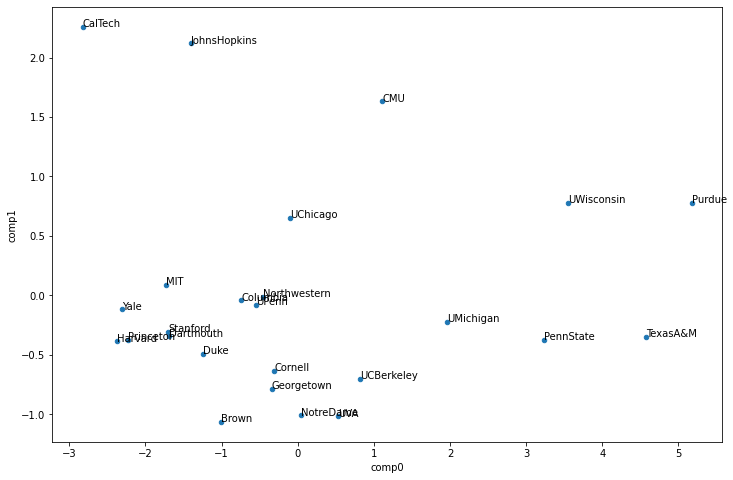

In [45]:
#So, combining them. 
ax = final.plot(x = 'comp0', y = 'comp1', kind = 'scatter', figsize=(12,8))
final[['comp0', 'comp1', 'Univ']].apply(lambda x: ax.text(*x), axis=1)

In [ ]:
# what is lambda function (Sureshot interview Question)